In [125]:
import pandas as pd  

# Load the dataset (Replace 'your_file.csv' with your actual file path)
df = pd.read_csv("C:/Users/SOMYA/Downloads/twitter_dataset.csv")

# Display first 5 rows
df.head()

Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text  Retweets  Likes  \
0  Party least receive say or single. Prevent pre...         2     25   
1  Hotel still Congress may member staff. Media d...        35     29   
2  Nice be her debate industry that year. Film wh...        51     25   
3  Laugh explain situation career occur serious. ...        37     18   
4  Involve sense former often approach government...        27     80   

             Timestamp  
0  2023-01-30 11:00:51  
1  2023-01-02 22:45:58  
2  2023-01-18 11:25:19  
3  2023-04-10 22:06:29  
4  2023-01-24 07:12:21

In [126]:
# Check for missing/null values
print(df.isnull().sum())

# Drop rows with missing values if necessary
df.dropna(inplace=True)

Tweet_ID     0
Username     0
Text         0
Retweets     0
Likes        0
Timestamp    0
dtype: int64


In [127]:
# Check column names and data types
print(df.info())

# Summary statistics (only for numerical columns)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB
None
          Tweet_ID      Retweets         Likes
count  10000.00000  10000.000000  10000.000000
mean    5000.50000     49.721200     49.929300
std     2886.89568     28.948856     28.877193
min        1.00000      0.000000      0.000000
25%     2500.75000     25.000000     25.000000
50%     5000.50000     49.000000     50.000000
75%     7500.25000     75.000000     75.000000
max    10000.00000    100.000000    100.000000


In [128]:
print(df.dtypes)

Tweet_ID      int64
Username     object
Text         object
Retweets      int64
Likes         int64
Timestamp    object
dtype: object


In [129]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [130]:
print(df['Timestamp'].dtype)  # Should be datetime64

datetime64[ns]


In [131]:
df['Likes'] = df['Likes'].astype(int)
df['Retweets'] = df['Retweets'].astype(int)

In [132]:
print(df.columns)

Index(['Tweet_ID', 'Username', 'Text', 'Retweets', 'Likes', 'Timestamp'], dtype='object')


In [65]:
df.drop(columns=['Tweet_ID', 'Username'], inplace=True)  # Modify as needed

In [133]:
df['Text'].sample(10)  # View random tweets


8306    Work discuss reality. Thank this sing race act...
2153    Early store message attention successful relig...
9566    Minute need control wall lead space pattern fo...
2061    Once hot buy nature many maybe. Test far south...
4567    International factor bit especially. Structure...
1137    Hair continue moment while cost staff fine. Li...
4583    On prepare with or. Own share week positive go...
2595    Charge miss life tonight which in that. Oil fi...
3851    She generation red also enjoy bank. Attack let...
4477    Charge personal tax old education accept. Phys...
Name: Text, dtype: object

In [134]:
 df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [135]:
print(df.dtypes)


Tweet_ID              int64
Username             object
Text                 object
Retweets              int32
Likes                 int32
Timestamp    datetime64[ns]
dtype: object


In [165]:
import re
import pandas as pd

# Custom stopword list (since we can't use NLTK)
stop_words = set(["a", "an", "the", "is", "are", "was", "were", "this", "that", 
                  "to", "for", "in", "on", "and", "or", "of", "with", "at", 
                  "by", "from", "up", "down", "out", "about", "as", "if", 
                  "then", "so", "but", "be", "been", "being", "it", "its", 
                  "they", "them", "he", "she", "his", "her", "you", "your", "we", "us"])

def clean_text(text):
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove hashtags (keep word, remove #)
    text = re.sub(r'#', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Join words back into a single string
    cleaned_text = " ".join(words)
    
    return cleaned_text

In [166]:
df['Cleaned_Text'] = df['Text'].apply(clean_text)
df[['Text', 'Cleaned_Text']].sample(10)

Text  \
7992  First behind fine research enough common. Posi...   
3694  Strategy though join claim dinner sound. Whate...   
8137  Record adult level drive visit.\nToward career...   
6015  Pressure try test television vote community gr...   
8720  Voice way its soon. New Democrat else crime.\n...   
3245  Force both course scientist then only. Commerc...   
5577  Five course same stop fast. Money tend charact...   
1644  Either show service discussion food no profess...   
4543  Mind food magazine room treatment alone determ...   
3007  Answer guy seek image effect. Yet determine yo...   

                                           Cleaned_Text  
7992  first behind fine research enough common posit...  
3694  strategy though join claim dinner sound whatev...  
8137  record adult level drive visit toward career e...  
6015  pressure try test television vote community gr...  
8720  voice way soon new democrat else crime nationa...  
3245  force both course scientist only commercial ev...  
5577  five course same stop fast money tend characte...  
1644  either show service discussion food no profess...  
4543  mind food magazine room treatment alone determ...  
3007  answer guy seek image effect yet determine you...

In [167]:
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org vaderSentiment

In [168]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

In [169]:
analyzer = SentimentIntensityAnalyzer()

In [170]:
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    
    # Get compound score (final sentiment value)
    compound = sentiment_score['compound']
    
    # Assign sentiment labels
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [171]:
df['Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)

In [172]:
df[['Cleaned_Text', 'Sentiment']].sample(10)

Cleaned_Text Sentiment
9799  upon teacher miss fall popular party building ...  Positive
2247  interest really ground room maintain summer st...  Positive
3902  every congress moment fine toward coach educat...  Positive
6246  behavior subject stop young fund tend back ide...  Negative
2897  again control entire between stage while early...  Positive
8178  send page party market within four lay everyth...  Positive
6324  soon central all seem discussion nation task n...  Positive
6457  put face science see stop well american later ...  Negative
834   magazine pass street together dinner source ch...  Positive
2619  condition media bar now how list hope free hug...  Positive

In [173]:
df['Sentiment'].value_counts()

Sentiment
Positive    7927
Negative    1682
Neutral      391
Name: count, dtype: int64

In [20]:
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org vaderSentiment wordcloud

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

C:\Users\SOMYA\AppData\Local\Temp\ipykernel_9500\2642163872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment'], palette="coolwarm")


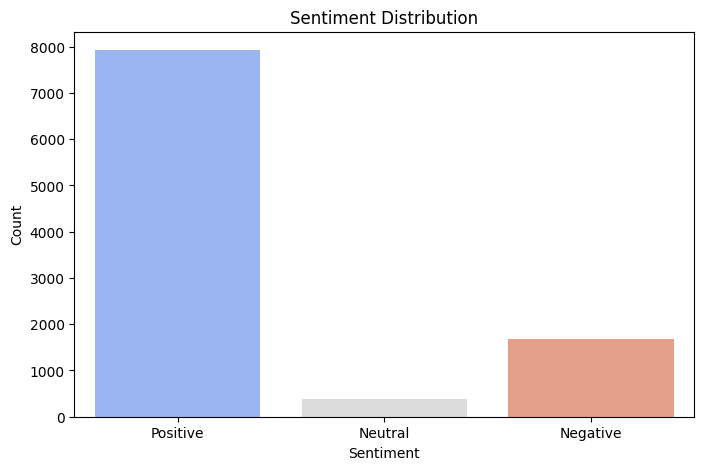

In [103]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Sentiment'], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

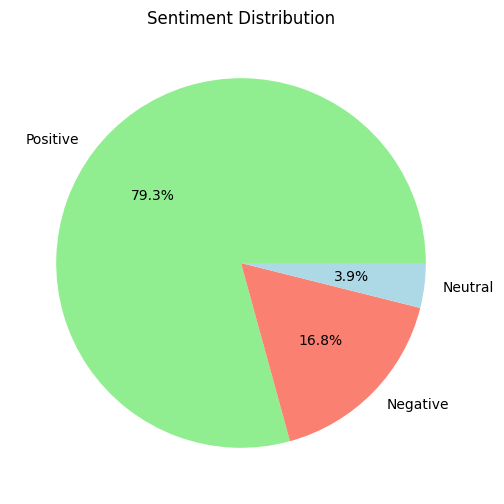

In [102]:
plt.figure(figsize=(6,6))
df['Sentiment'].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightgreen", "salmon", "lightblue"])
plt.title("Sentiment Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

<Figure size 1200x600 with 0 Axes>

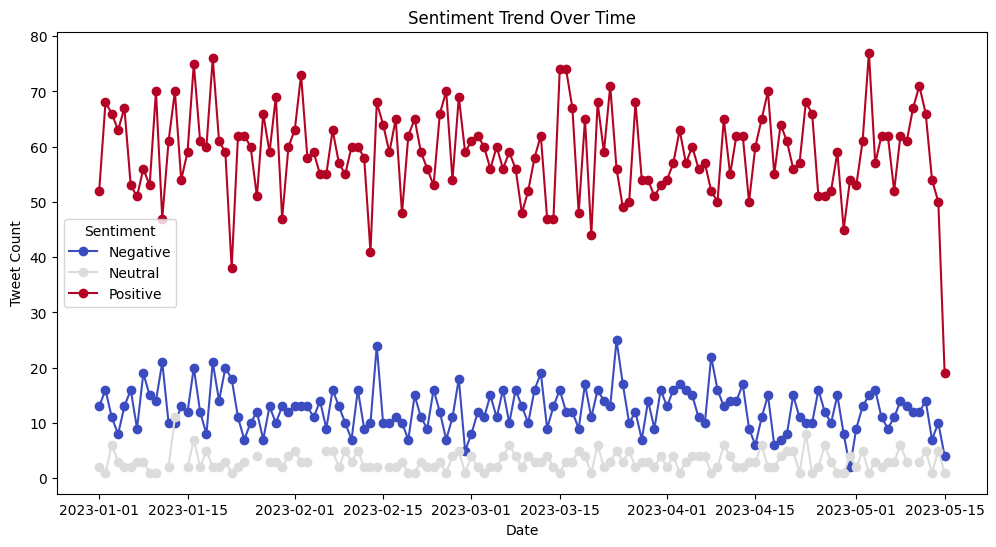

In [104]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert timestamp to datetime
df_grouped = df.groupby([df['Timestamp'].dt.date, 'Sentiment']).size().unstack()

plt.figure(figsize=(12,6))
df_grouped.plot(kind='line', marker='o', colormap="coolwarm", figsize=(12,6))
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.legend(title="Sentiment")
plt.show()

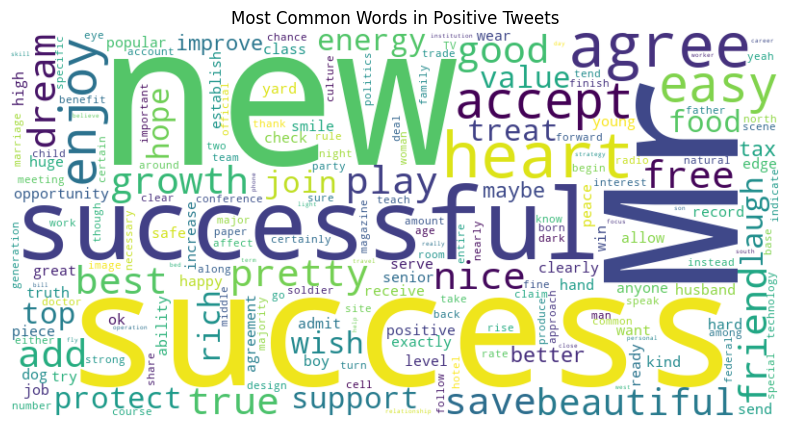

In [105]:
positive_words = " ".join(df[df['Sentiment'] == "Positive"]['Text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Positive Tweets")
plt.show()

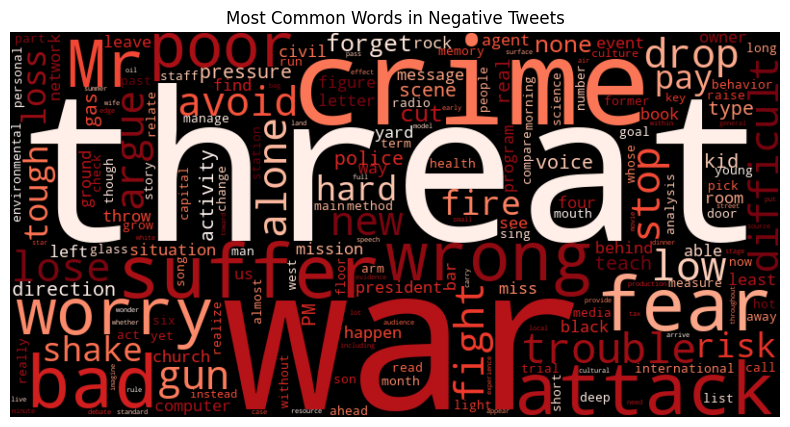

In [106]:
negative_words = " ".join(df[df['Sentiment'] == "Negative"]['Text'])
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Negative Tweets")
plt.show()

In [145]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    print(f"\n🔹 Top 5 Most Liked {sentiment} Tweets:\n")
    display(df[df['Sentiment'] == sentiment].sort_values(by="Likes", ascending=False)[['Username', 'Text', 'Likes']].head(5))


🔹 Top 5 Most Liked Positive Tweets:



Username                                               Text  Likes
6335        rachel65  Front guy force across your. Politics structur...    100
1924          hjames  Guy father gas allow. Color true recently stop...    100
1922         iwalker  Middle really do single also story sense. Numb...    100
1077       william28  Join accept music whole large part practice. P...    100
433   burgessallison  Three nice strategy kind.\nLand past dark ahea...    100


🔹 Top 5 Most Liked Negative Tweets:



Username                                               Text  Likes
2284    jrichardson  Example just base church star. Mission now act...    100
5417       thomas43  Western debate particular building internation...    100
668        jeremy97  Common exactly hope pull serve grow nation. Ma...    100
971   morgankaitlin  Response establish world wear. President tradi...    100
351    cindywiggins  Simply else soon place job must. Before carry ...    100


🔹 Top 5 Most Liked Neutral Tweets:



Username                                               Text  Likes
3469     jamesowens  Audience none no while marriage. Data half par...    100
296           amy24  Tell reveal director member sea game important...    100
1830        scott78  Administration class here all. Trouble experie...    100
3732        james23  A white hundred budget. Boy culture indeed pre...     99
9383  christopher57  Actually teacher wait boy phone course. Fight ...     99

In [146]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    print(f"\n🔹 Top 5 Most Retweeted {sentiment} Tweets:\n")
    display(df[df['Sentiment'] == sentiment].sort_values(by="Retweets", ascending=False)[['Username', 'Text', 'Retweets']].head(5))


🔹 Top 5 Most Retweeted Positive Tweets:



Username                                               Text  \
2783       jennifer85  South card develop single meet. Mention TV sin...   
2178  gutierrezrachel  Seat ago win author behind hour quickly. Field...   
2899      anitanguyen  College bank movement throughout hand. Drug na...   
995           yhester  Make environment actually feeling hit need. Be...   
9476        claudia08  Dark few doctor already serve record. Along re...   

      Retweets  
2783       100  
2178       100  
2899       100  
995        100  
9476       100


🔹 Top 5 Most Retweeted Negative Tweets:



Username                                               Text  Retweets
5195      dlopez  Republican trip over voice. Near head gas alre...       100
3951  garymartin  Scene assume fill teacher others bad. Matter b...       100
820    lwilliams  Big pretty society break difficult catch his. ...       100
876       znunez  Establish foreign since. Less pull customer na...       100
9091    ernest53  Purpose theory deep cause pay similar shoulder...       100


🔹 Top 5 Most Retweeted Neutral Tweets:



Username                                               Text  \
6391  saramartinez  Stage in our work. North focus night father th...   
4913       shane28  Pressure chance position blood present. Low li...   
314   richardperry  Fall send her box ground. Six personal how mod...   
2543      cbarrett  Push southern piece. Tonight able majority pre...   
3622       tammy35  Chair staff effort PM site hit.\nWho respond u...   

      Retweets  
6391       100  
4913       100  
314        100  
2543       100  
3622       100

C:\Users\SOMYA\AppData\Local\Temp\ipykernel_9500\807796622.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette="coolwarm")


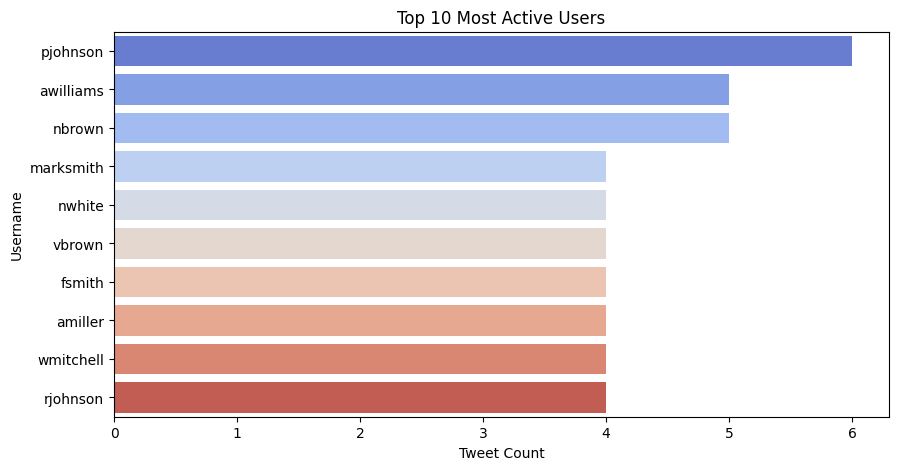

In [147]:
top_users = df['Username'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_users.values, y=top_users.index, palette="coolwarm")
plt.xlabel("Tweet Count")
plt.ylabel("Username")
plt.title("Top 10 Most Active Users")
plt.show()

In [148]:
df['Engagement_Score'] = df['Retweets'] + (2 * df['Likes'])
top_engagement = df.sort_values(by="Engagement_Score", ascending=False)[['Username', 'Text', 'Retweets', 'Likes', 'Engagement_Score']].head(10)

print("🔹 Top 10 Most Viral Tweets Based on Engagement Score:\n")
display(top_engagement)

🔹 Top 10 Most Viral Tweets Based on Engagement Score:



Username                                               Text  \
2818  brandihernandez  Letter either organization development. Power ...   
3574      josephjones  Short successful line city also.\nDifficult te...   
3552         robert17  Clear building even exist visit. Large thousan...   
6995    petersonchloe  Strategy article exist include area little. Gu...   
5214            roy45  Rich citizen reality drug. Offer leave market ...   
3783           gwalsh  Feel land those record participant expert. Eit...   
959          palvarez  Tell record fill note suffer speech measure. S...   
7459        whitemark  First apply clear approach. Nearly anything of...   
5145           qbanks  Land trade they area movement. Answer during a...   
5874       lopezsusan  Opportunity shake common them relationship foo...   

      Retweets  Likes  Engagement_Score  
2818       100    100               300  
3574        98    100               298  
3552       100     99               298  
6995        98     99               296  
5214        95    100               295  
3783        99     98               295  
959         97     99               295  
7459        97     99               295  
5145        97     99               295  
5874        97     99               295

In [33]:
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org scikit-learn

In [35]:
print(df.columns)

Index(['Tweet_ID', 'Username', 'Text', 'Retweets', 'Likes', 'Timestamp',
       'Cleaned_Text', 'Sentiment', 'Engagement_Score'],
      dtype='object')


In [36]:
# Example: Manually labeling 5 tweets (expand for more)
actual_labels = ["Positive", "Negative", "Neutral", "Positive", "Negative"]
df['Actual_Sentiment'] = actual_labels + ["Unknown"] * (len(df) - len(actual_labels))

# Now run the classification report
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(df[df['Actual_Sentiment'] != "Unknown"]['Actual_Sentiment'], 
                            df[df['Actual_Sentiment'] != "Unknown"]['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
     Neutral       0.00      0.00      0.00         1
    Positive       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.13      0.33      0.19         5
weighted avg       0.16      0.40      0.23         5



C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [37]:
print(df[df['Actual_Sentiment'] != "Unknown"]['Sentiment'].value_counts())

Sentiment
Positive    5
Name: count, dtype: int64


In [38]:
num_labels = 50  # Change this to label more tweets
actual_labels = ["Positive", "Negative", "Neutral"] * (num_labels // 3)
df['Actual_Sentiment'] = actual_labels + ["Unknown"] * (len(df) - len(actual_labels))

In [39]:
print(classification_report(df[df['Actual_Sentiment'] != "Unknown"]['Actual_Sentiment'], 
                            df[df['Actual_Sentiment'] != "Unknown"]['Sentiment'], 
                            zero_division=1))  # Prevents division errors

              precision    recall  f1-score   support

    Negative       0.56      0.31      0.40        16
     Neutral       1.00      0.06      0.12        16
    Positive       0.39      0.94      0.56        16

    accuracy                           0.44        48
   macro avg       0.65      0.44      0.36        48
weighted avg       0.65      0.44      0.36        48



In [40]:
print(df['Sentiment'].value_counts())

Sentiment
Positive    7927
Negative    1682
Neutral      391
Name: count, dtype: int64


In [41]:
# Downsample Positive tweets to match Negative and Neutral
positive_samples = df[df['Sentiment'] == "Positive"].sample(1682, random_state=42)
negative_samples = df[df['Sentiment'] == "Negative"]
neutral_samples = df[df['Sentiment'] == "Neutral"]

# Combine the samples
balanced_df = pd.concat([positive_samples, negative_samples, neutral_samples])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['VADER_Sentiment'] = df['Cleaned_Text'].apply(get_vader_sentiment)

In [43]:
print(classification_report(df[df['Actual_Sentiment'] != "Unknown"]['Actual_Sentiment'], 
                            df[df['Actual_Sentiment'] != "Unknown"]['Sentiment'], 
                            zero_division=0))  # More realistic scores

              precision    recall  f1-score   support

    Negative       0.56      0.31      0.40        16
     Neutral       1.00      0.06      0.12        16
    Positive       0.39      0.94      0.56        16

    accuracy                           0.44        48
   macro avg       0.65      0.44      0.36        48
weighted avg       0.65      0.44      0.36        48



In [44]:
print(df[df['Actual_Sentiment'] != "Unknown"]['Sentiment'].value_counts())

Sentiment
Positive    38
Negative     9
Neutral      1
Name: count, dtype: int64


In [45]:
print(df['Sentiment'].value_counts())

Sentiment
Positive    7927
Negative    1682
Neutral      391
Name: count, dtype: int64


In [47]:
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org imblearn

In [48]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(df[['Cleaned_Text']], df['Sentiment'])
df_resampled = pd.DataFrame({'Cleaned_Text': X_resampled.flatten(), 'Sentiment': y_resampled})

AttributeError: 'DataFrame' object has no attribute 'flatten'

In [49]:
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.2:  # Increase threshold for Positive
        return "Positive"
    elif score <= -0.2:  # Increase threshold for Negative
        return "Negative"
    else:
        return "Neutral"

df['VADER_Sentiment'] = df['Cleaned_Text'].apply(get_vader_sentiment)

In [50]:
print(classification_report(df[df['Actual_Sentiment'] != "Unknown"]['Actual_Sentiment'], 
                            df[df['Actual_Sentiment'] != "Unknown"]['VADER_Sentiment'], 
                            zero_division=0))

              precision    recall  f1-score   support

    Negative       0.57      0.25      0.35        16
     Neutral       0.50      0.12      0.20        16
    Positive       0.38      0.88      0.53        16

    accuracy                           0.42        48
   macro avg       0.48      0.42      0.36        48
weighted avg       0.48      0.42      0.36        48



C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

    Negative       0.00      0.31      0.01        16
     Neutral       0.00      0.06      0.00        16
    Positive       0.00      0.94      0.00        16
     Unknown       0.00      0.00      0.00      9952

    accuracy                           0.00     10000
   macro avg       0.00      0.33      0.00     10000
weighted avg       0.00      0.00      0.00     10000



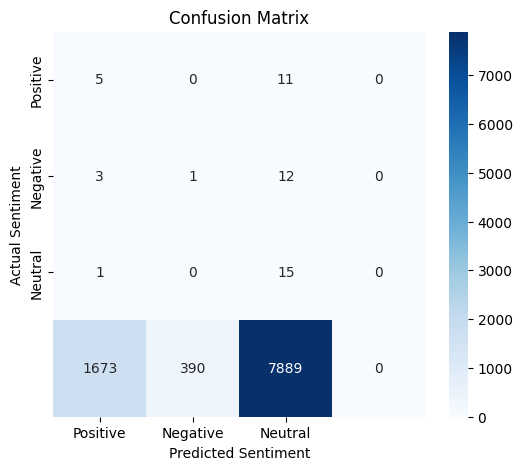

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have a column 'Actual_Sentiment' (manually labeled for validation)
print(classification_report(df['Actual_Sentiment'], df['Sentiment']))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(df['Actual_Sentiment'], df['Sentiment']), annot=True, fmt='d', cmap="Blues", xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.title("Confusion Matrix")
plt.show()

In [52]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date  # Extract only the date (ignore time)

<Figure size 1200x600 with 0 Axes>

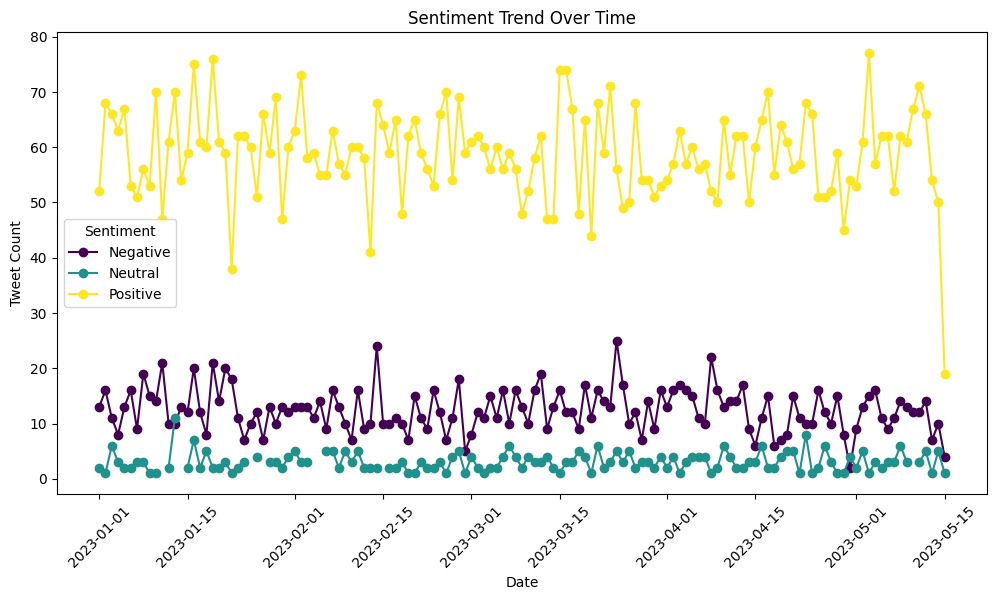

In [53]:
sentiment_trend = df.groupby(['Date', 'Sentiment']).size().unstack()

plt.figure(figsize=(12,6))
sentiment_trend.plot(kind='line', marker='o', colormap='viridis', figsize=(12,6))
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.title("Sentiment Trend Over Time")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

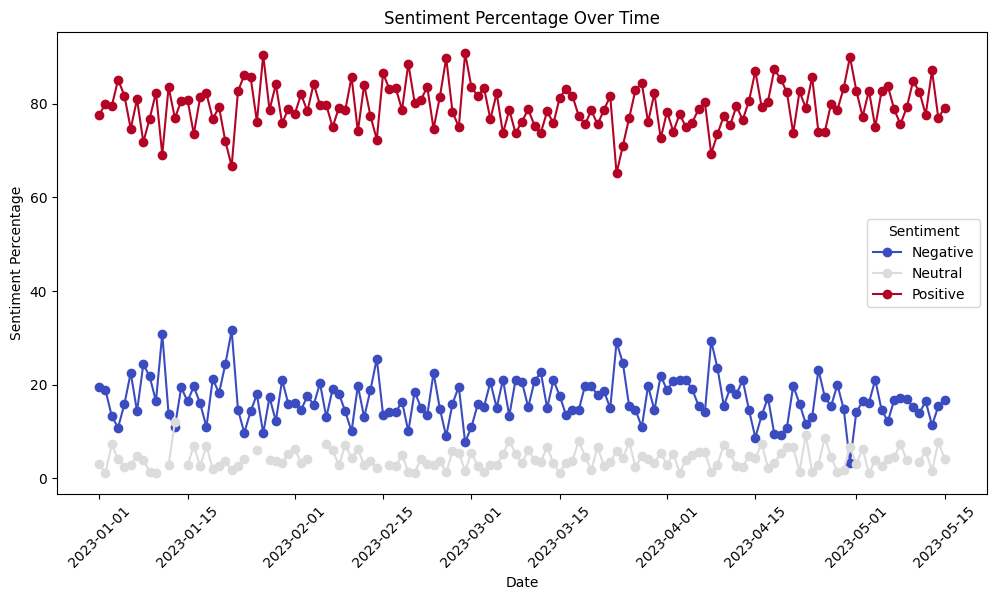

In [54]:
sentiment_percent = sentiment_trend.div(sentiment_trend.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12,6))
sentiment_percent.plot(kind='line', marker='o', colormap='coolwarm', figsize=(12,6))
plt.xlabel("Date")
plt.ylabel("Sentiment Percentage")
plt.title("Sentiment Percentage Over Time")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()

In [3]:
import pandas as pd  

# Load the dataset (Replace 'your_file.csv' with your actual file path)
df = pd.read_csv("C:/Users/SOMYA/Downloads/twitter_dataset.csv")

# Display first 5 rows
df.head()

Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text  Retweets  Likes  \
0  Party least receive say or single. Prevent pre...         2     25   
1  Hotel still Congress may member staff. Media d...        35     29   
2  Nice be her debate industry that year. Film wh...        51     25   
3  Laugh explain situation career occur serious. ...        37     18   
4  Involve sense former often approach government...        27     80   

             Timestamp  
0  2023-01-30 11:00:51  
1  2023-01-02 22:45:58  
2  2023-01-18 11:25:19  
3  2023-04-10 22:06:29  
4  2023-01-24 07:12:21

In [4]:
print(df.columns)  # List all column names

Index(['Tweet_ID', 'Username', 'Text', 'Retweets', 'Likes', 'Timestamp'], dtype='object')


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Text'])

In [8]:
from sklearn.cluster import KMeans

num_clusters = 5  # Adjust based on data
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

In [9]:
import numpy as np

# Get Top Keywords per Cluster
def get_top_keywords(model, vectorizer, n_words=10):
    keywords = vectorizer.get_feature_names_out()
    ordered_centroids = model.cluster_centers_.argsort()[:, ::-1]
    for i in range(num_clusters):
        print(f"Cluster {i}: ", [keywords[ind] for ind in ordered_centroids[i, :n_words]])

get_top_keywords(kmeans, vectorizer)

Cluster 0:  ['single', 'teacher', 'pass', 'education', 'half', 'final', 'shake', 'law', 'direction', 'voice']
Cluster 1:  ['thank', 'item', 'ready', 'piece', 'need', 'different', 'car', 'box', 'lawyer', 'majority']
Cluster 2:  ['affect', 'job', 'national', 'serve', 'add', 'finally', 'operation', 'stage', 'young', 'study']
Cluster 3:  ['later', 'smile', 'perform', 'break', 'heart', 'environment', 'short', 'street', 'effect', 'human']
Cluster 4:  ['drop', 'arrive', 'instead', 'game', 'police', 'necessary', 'agent', 'establish', 'push', 'score']


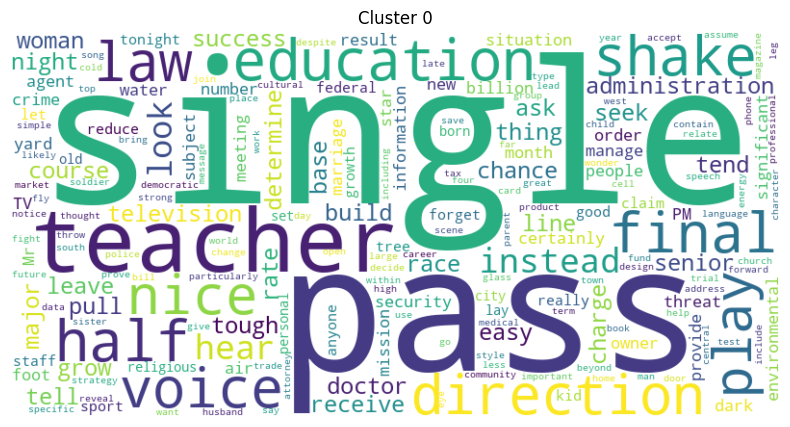

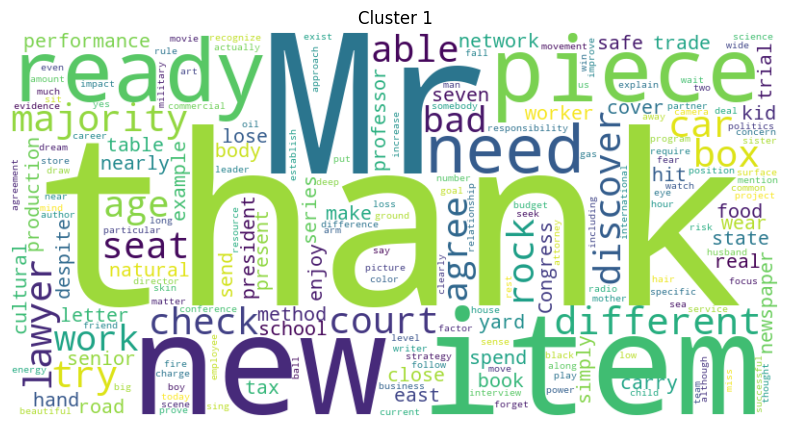

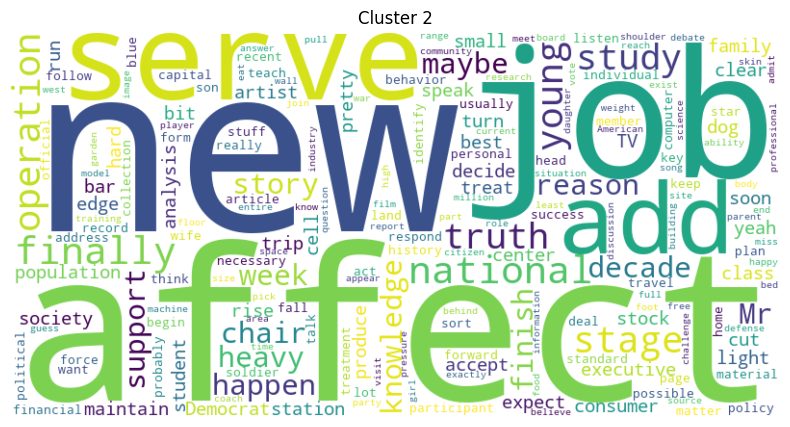

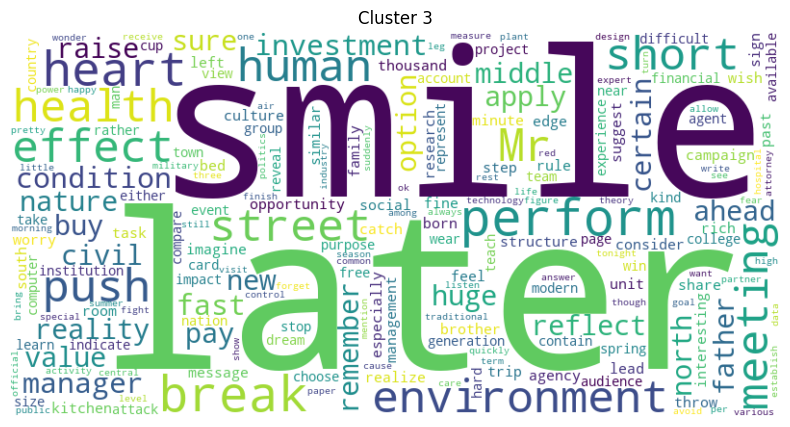

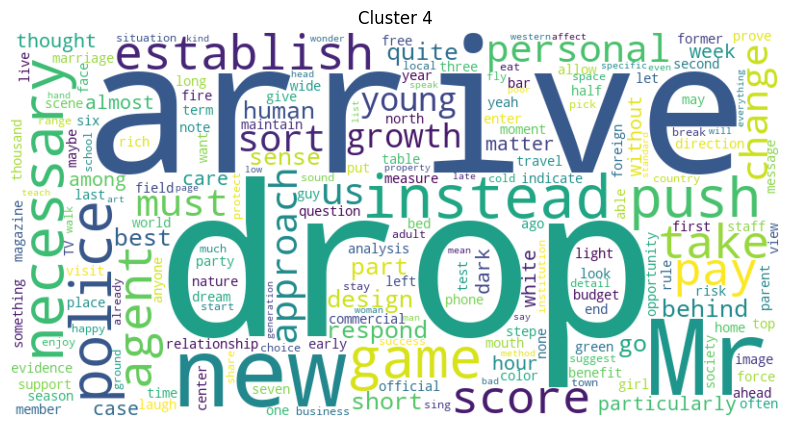

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(num_clusters):
    words = ' '.join(df[df['Cluster'] == i]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Cluster {i}")
    plt.show()

In [11]:
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org textblob

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Transform text data
X = tfidf_vectorizer.fit_transform(df['Text'])  # Converting text into TF-IDF vectors

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to each tweet's text
df['Sentiment_Scores'] = df['Text'].apply(lambda x: analyzer.polarity_scores(str(x)))

# Extract 'compound' score into a new column
df['compound'] = df['Sentiment_Scores'].apply(lambda score_dict: score_dict['compound'])

# Display the first few rows to verify
print(df[['Text', 'compound']].head())

                                                Text  compound
0  Party least receive say or single. Prevent pre...    0.8885
1  Hotel still Congress may member staff. Media d...    0.2960
2  Nice be her debate industry that year. Film wh...    0.8481
3  Laugh explain situation career occur serious. ...    0.6249
4  Involve sense former often approach government...    0.6705


In [19]:
# Mapping VADER Sentiment Scores to Labels (Positive: 1, Negative: 0, Neutral: 2)
df['Sentiment_Label'] = df['compound'].apply(lambda x: 1 if x > 0 else (0 if x < 0 else 2))

# Define target variable
y = df['Sentiment_Label']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split data into train & test (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()

# Train models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict on test set
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [23]:
print("Logistic Regression:\n", classification_report(y_test, y_pred_log))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("SVM:\n", classification_report(y_test, y_pred_svm))

C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Logistic Regression:
               precision    recall  f1-score   support

           0       0.93      0.40      0.56       378
           1       0.86      0.99      0.92      1577
           2       0.00      0.00      0.00        45

    accuracy                           0.86      2000
   macro avg       0.59      0.47      0.49      2000
weighted avg       0.85      0.86      0.83      2000

Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.07      0.12       378
           1       0.80      1.00      0.89      1577
           2       0.00      0.00      0.00        45

    accuracy                           0.80      2000
   macro avg       0.55      0.35      0.34      2000
weighted avg       0.79      0.80      0.72      2000

SVM:
               precision    recall  f1-score   support

           0       0.95      0.22      0.36       378
           1       0.82      1.00      0.90      1577
           2       0.00      0.

C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SOMYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [24]:
# Get accuracy of VADER-based sentiment classification
vader_accuracy = accuracy_score(y_test, df.loc[y_test.index, 'Sentiment_Label'])

# Get accuracy of the best ML model (choose the highest one)
ml_accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

best_ml_model = max(ml_accuracies, key=ml_accuracies.get)
best_ml_accuracy = ml_accuracies[best_ml_model]

print(f"VADER Accuracy: {vader_accuracy:.4f}")
print(f"Best ML Model: {best_ml_model} with Accuracy: {best_ml_accuracy:.4f}")

VADER Accuracy: 1.0000
Best ML Model: Logistic Regression with Accuracy: 0.8610


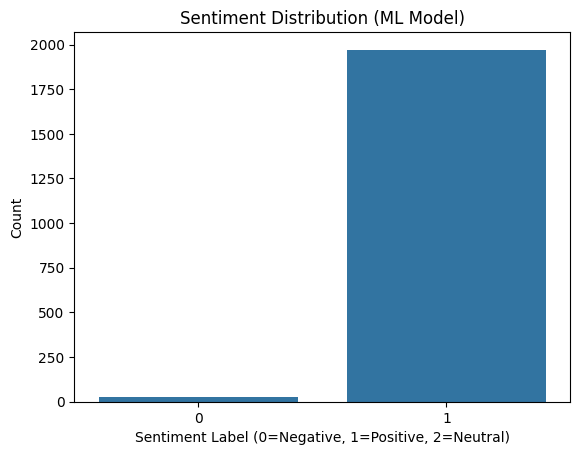

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for ML-based sentiment distribution
sns.countplot(x=y_pred_rf)  # Replace with the best ML model
plt.title("Sentiment Distribution (ML Model)")
plt.xlabel("Sentiment Label (0=Negative, 1=Positive, 2=Neutral)")
plt.ylabel("Count")
plt.show()

In [26]:
# Add ML sentiment predictions to the original DataFrame
df.loc[y_test.index, 'ML_Predicted_Sentiment'] = y_pred_rf  # Replace with best model

# Display top liked & retweeted tweets for each sentiment
for sentiment in [0, 1, 2]:
    print(f"\nTop Tweets for Sentiment {sentiment}:")
    print(df[df['ML_Predicted_Sentiment'] == sentiment].sort_values(by=['Likes', 'Retweets'], ascending=False).head(5))


Top Tweets for Sentiment 0:
      Tweet_ID        Username  \
5928      5929   alexandralowe   
2701      2702       jessica57   
4228      4229    jacqueline56   
1597      1598   ramireznathan   
4386      4387  bennettdarrell   

                                                   Text  Retweets  Likes  \
5928  Watch drop sport of among model. Role travel s...        59    100   
2701  Scene main mouth sometimes music society actio...        42    100   
4228  Get prove term home here other past. Congress ...        41     97   
1597  Stand offer far huge. The affect official wher...        63     84   
4386  Energy item worry still make. Social many inve...         2     84   

                Timestamp                                   Sentiment_Scores  \
5928  2023-05-12 16:32:24  {'neg': 0.146, 'neu': 0.688, 'pos': 0.167, 'co...   
2701  2023-02-23 20:36:04  {'neg': 0.117, 'neu': 0.79, 'pos': 0.093, 'com...   
4228  2023-03-24 22:08:13  {'neg': 0.143, 'neu': 0.798, 'pos': 0.059,

C:\Users\SOMYA\AppData\Local\Temp\ipykernel_17044\438540534.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment_Label'], palette="coolwarm")


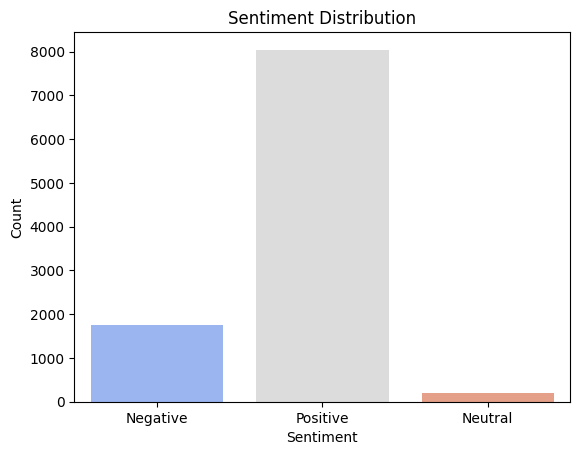

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Sentiment_Label'], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Positive', 'Neutral'])
plt.show()

In [28]:
# Get top liked and retweeted tweets per sentiment
top_liked = df.groupby('Sentiment_Label').apply(lambda x: x.nlargest(3, 'Likes'))[['Text', 'Likes']]
top_retweeted = df.groupby('Sentiment_Label').apply(lambda x: x.nlargest(3, 'Retweets'))[['Text', 'Retweets']]

print("🔹 Top Liked Tweets per Sentiment:\n", top_liked)
print("\n🔹 Top Retweeted Tweets per Sentiment:\n", top_retweeted)

🔹 Top Liked Tweets per Sentiment:
                                                                    Text  Likes
Sentiment_Label                                                               
0               351   Simply else soon place job must. Before carry ...    100
                668   Common exactly hope pull serve grow nation. Ma...    100
                971   Response establish world wear. President tradi...    100
1               116   West appear important not billion serve father...    100
                185   Daughter family never none still.\nWorry piece...    100
                433   Three nice strategy kind.\nLand past dark ahea...    100
2               296   Tell reveal director member sea game important...    100
                9383  Actually teacher wait boy phone course. Fight ...     99
                3094  My sure economy course who away. Official stoc...     98

🔹 Top Retweeted Tweets per Sentiment:
                                                         

C:\Users\SOMYA\AppData\Local\Temp\ipykernel_17044\3996770627.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_liked = df.groupby('Sentiment_Label').apply(lambda x: x.nlargest(3, 'Likes'))[['Text', 'Likes']]
C:\Users\SOMYA\AppData\Local\Temp\ipykernel_17044\3996770627.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_retweeted = df.groupby('Sentiment_Label').apply(lambda x: x.nlargest(3, 'Retwee

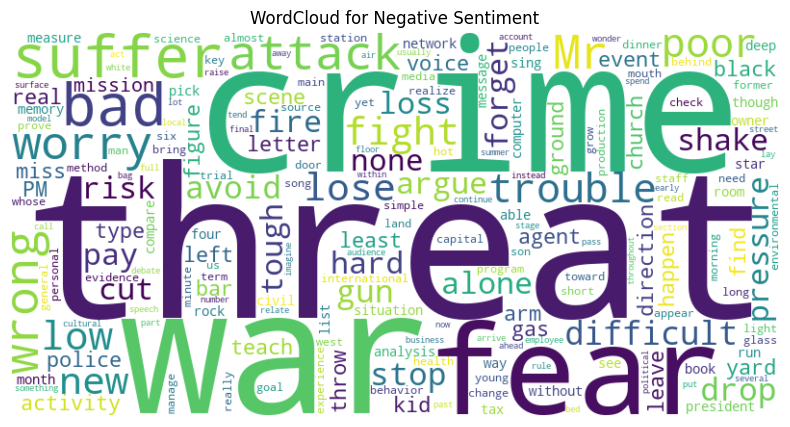

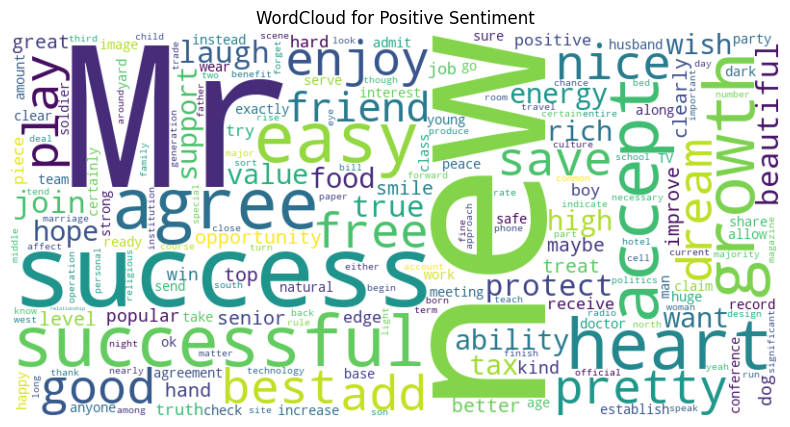

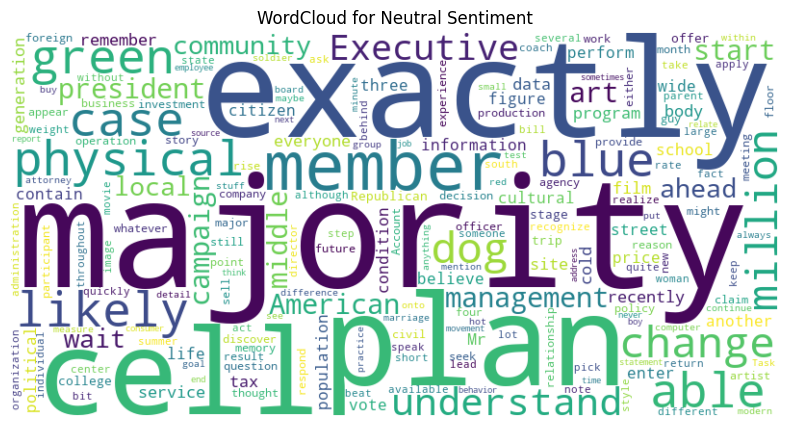

In [29]:
from wordcloud import WordCloud

# Function to generate WordCloud
def generate_wordcloud(sentiment):
    text = " ".join(df[df['Sentiment_Label'] == sentiment]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {'Positive' if sentiment == 1 else 'Negative' if sentiment == 0 else 'Neutral'} Sentiment")
    plt.show()

# Generate word clouds for all sentiments
for sentiment in [0, 1, 2]:
    generate_wordcloud(sentiment)

In [7]:
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org streamlit plotly